In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("/content/Telco Cleaned View.csv")

In [4]:
print(df.head())
print(df.info())
print(df['Churn'].value_counts())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

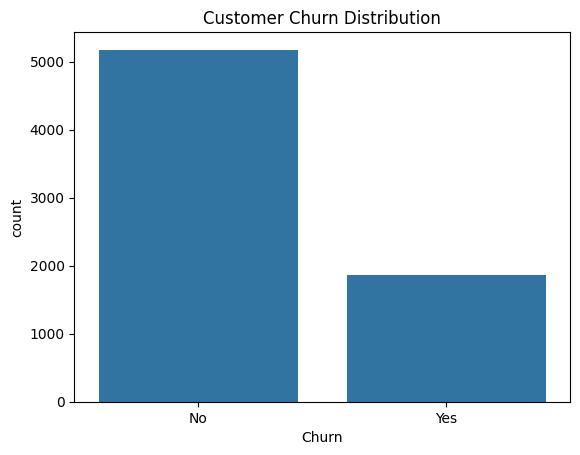

In [7]:
sns.countplot(data=df, x='Churn')
plt.title("Customer Churn Distribution")
plt.show()

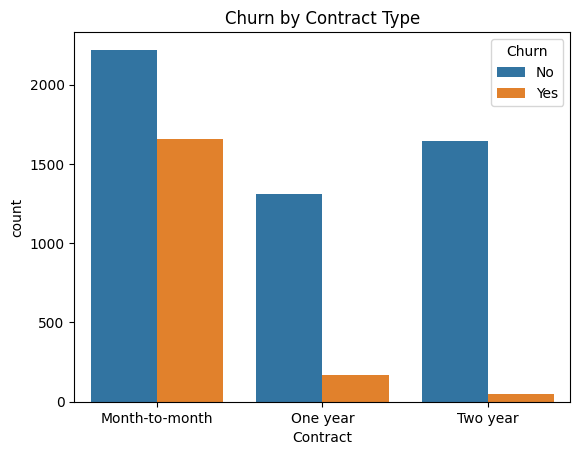

In [8]:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn by Contract Type")
plt.show()

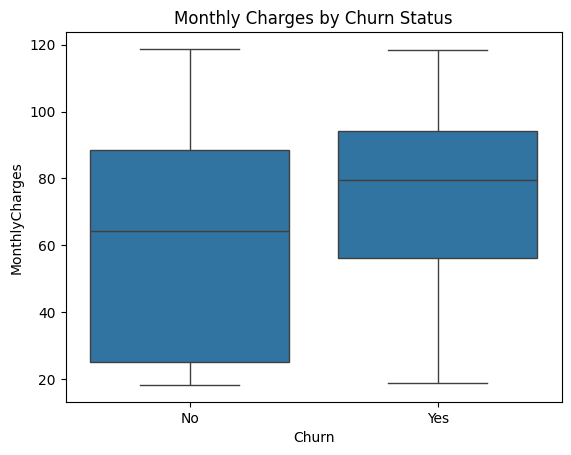

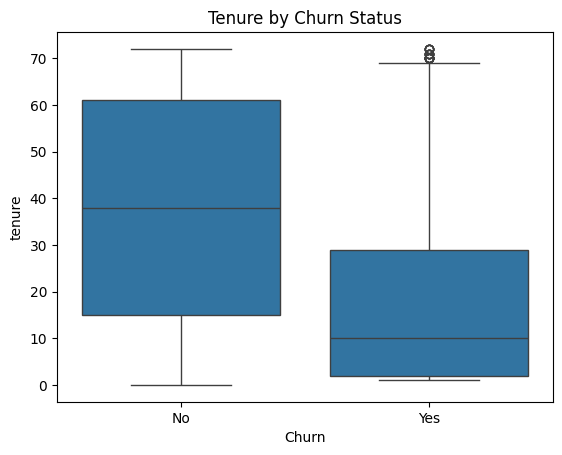

In [9]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges by Churn Status")
plt.show()

sns.boxplot(data=df, x='Churn', y='tenure')
plt.title("Tenure by Churn Status")
plt.show()


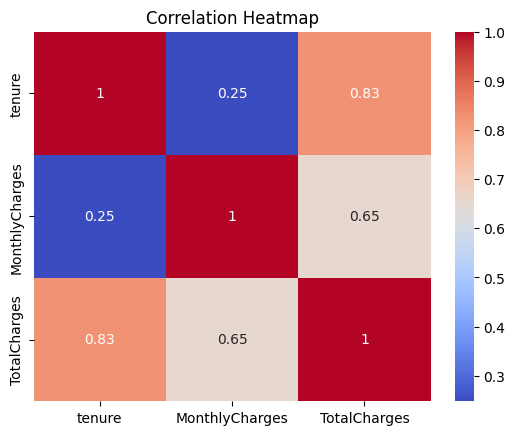

In [16]:
numeric_features = ['tenure','MonthlyCharges','TotalCharges']
corr = df[numeric_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [44]:
df['TenureBucket'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-12', '13-24', '25-48', '49+']
)

df['HighRisk'] = ((df['Contract']=='Month-to-month') & (df['Churn']=='Yes')).astype(int)

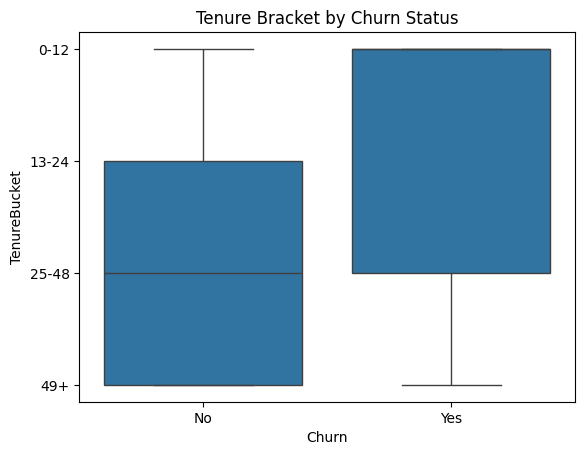

In [45]:
sns.boxplot(data=df, x='Churn', y='TenureBucket')
plt.title("Tenure Bracket by Churn Status")
plt.show()

In [30]:
contract_summary = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().fillna(0)
contract_summary['ChurnRate'] = contract_summary['Yes']

In [31]:
from google.colab import files

contract_summary.to_csv("contract_churn_summary.csv", index=True)
files.download("contract_churn_summary.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
payment_summary = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack().fillna(0)
payment_summary['ChurnRate'] = payment_summary['Yes']
payment_summary.to_csv("payment_churn_summary.csv", index=True)
files.download("payment_churn_summary.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
tenure_summary = df.groupby('TenureBucket')['Churn'].value_counts(normalize=True).unstack().fillna(0)
tenure_summary['ChurnRate'] = tenure_summary['Yes']
tenure_summary.to_csv("tenure_churn_summary.csv", index=True)
files.download("tenure_churn_summary.csv")

/tmp/ipython-input-1794759358.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_summary = df.groupby('TenureBucket')['Churn'].value_counts(normalize=True).unstack().fillna(0)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
df[['tenure', 'TenureBucket', 'Contract', 'Churn', 'HighRisk']].head(10)

,tenure,TenureBucket,Contract,Churn,HighRisk
0,1,0-12,Month-to-month,No,0
1,34,25-48,One year,No,0
2,2,0-12,Month-to-month,Yes,1
3,45,25-48,One year,No,0
4,2,0-12,Month-to-month,Yes,1
5,8,0-12,Month-to-month,Yes,1
6,22,13-24,Month-to-month,No,0
7,10,0-12,Month-to-month,No,0
8,28,25-48,Month-to-month,Yes,1
9,62,49+,One year,No,0


In [47]:
df.to_csv("telco_cleaned_updated.csv", index=False)
files.download("telco_cleaned_updated.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>